__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

In [1]:
using PyPlot

In [2]:
#La función toma una función de Julia, un punto x en los reales y el tamaño de la diferencia h
function der_num(f::Function, x, h)
    #Se regresa la derivada numérica
    j = (f(x+h)-f(x))/h;
    return j;
end

der_num (generic function with 1 method)

In [3]:
#Tomamos el punto x=0.7 y una diferencia de h=0.01
der_num(cos, 0.7, 0.01)

-0.6480311293980301

In [4]:
#Se comprueba con el valor exacto
-sin(0.7)

-0.644217687237691

In [5]:
#ponemos dos arrays, el primero tendrá cada cálculo de la derivada numérica y el segundo contendrá el inverso de cada diferencia

numDerArray = zeros(30);
diffArray = zeros(30);

#Se define una diferencia inicial, que va a ser dividida en el for por 100*i para disminuir la diferencia
j=1;

#Con el for se calculan las derivadas y los inversos de la diferencia y se insertan en cada array
for i in 1:30
    
    numDerArray[i] = der_num(cos, 0.5, j/(100*i));
    diffArray[i] = (100*i)/j;
end

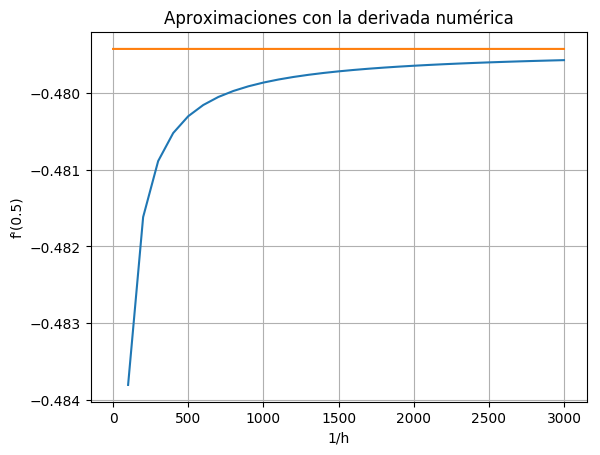

In [6]:
#graficamos las aproximaciones a la derivada en azul
#En anaranjado es una recta que pasa por el valor real

x=linspace(0,3000,3000);
y=(-sin(0.5))*ones(length(x));
xlabel("1/h")
ylabel("f'(0.5)")
title("Aproximaciones con la derivada numérica")
grid("on")
plot(diffArray,numDerArray);
plot(x,y);

In [7]:
#gráfica del error relativo
#Se declaran dos arrays, el primero tendrá cada cálculo de la epsilon y el segundo contendrá cada diferencia

epsilonArray = zeros(30);
diffArray = zeros(30);

#Se define una diferencia inicial, que va a ser dividida en el for por 100*i para disminuir la diferencia
h=1;

for i in 1:30
    epsilonArray[i] = abs((der_num(cos, 0.5, h/(100*i))+sin(0.5))/sin(0.5));
    diffArray[i] = h/(100*i);
end

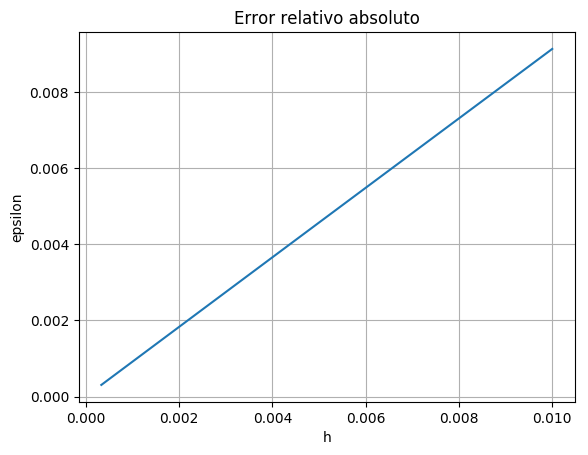

In [8]:
#Se grafica el error relativo absoluto
xlabel("h")
ylabel("epsilon")
title("Error relativo absoluto")
grid("on")
plot(diffArray,epsilonArray);

Como la gráfica del error relativo es una recta, entonces el error es de orden h.


__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica?

Recordamos la expansion en serie de Taylor de $ f(x+h)$ alrededor de $ h=0$:

$$ f(x+h) = f(x) + h\frac{d}{d\xi}f(\xi) + \frac{h^2}{2}\frac{d^2}{d^2\xi}f(\xi) + ... $$

y análogamente para $ f(x-h)$

Ahora restamos:

$$ f(x+h) - f(x-h) = 2h\frac{d}{d\xi}f(\xi) + \frac{h^3}{3}\frac{d^3}{d^3\xi}f(\xi) + O(h^5) $$

Usando la definicion de $ \Delta f(x,h) = f(x+h) - f(x) $ tenemos que

$$ \Delta f(x,h) = 2hf^{'}(x) + O(h^3) $$

Si despejamos, llegamos a 

$$ \frac{\Delta f(x,h)}{2h} - f^{'}(x) = O(h^2) $$





__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [9]:
#practicamente repetiremos lo que hicimos en el ejercicio 2

#La función toma una función de Julia, un punto x en los reales y el tamaño de la diferencia h
function der_num_sym(f::Function, x, h)
    #Se regresa la derivada numérica simétrica
    j = (f(x+h)-f(x-h))/(2*h);
    return j;
end

der_num_sym (generic function with 1 method)

In [10]:
#Se usa el punto x=0.5 y una diferencia de h=0.01
der_num_sym(cos, 0.5, 0.01)

-0.4794175482185081

In [11]:
#Se comprueba con el valor exacto
-sin(0.5)

-0.479425538604203

In [12]:
#ponemos dos arrays, el primero tendrá cada cálculo de la derivada numérica y el segundo contendrá el inverso de cada diferencia

symmNumDerArray = zeros(30);
symmDiffArray = zeros(30);

#Se define una diferencia inicial, que va a ser dividida en el for por 100*i para disminuir la diferencia
j=1;
#Con el for se calculan las derivadas y los inversos de la diferencia y se insertan en cada array
for i in 1:30
    symmNumDerArray[i] = der_num_sym(cos, 0.5, j/(100*i));
    symmDiffArray[i] = (100*i)/j;
end

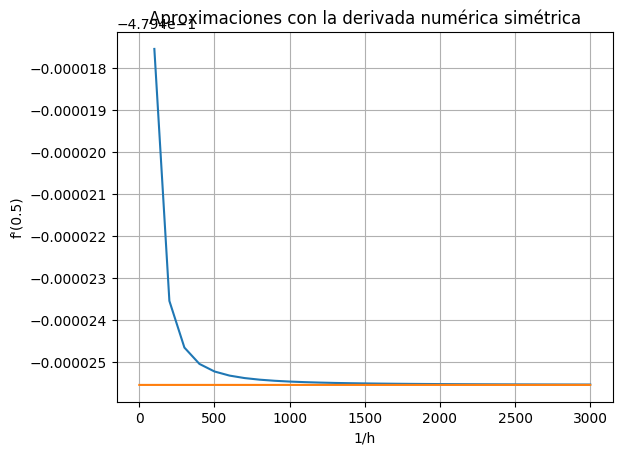

In [13]:
#Se grafican las aproximaciones a la derivada en azul
#En anaranjado es una recta que pasa por el valor real

x=linspace(0,3000,3000);
y=(-sin(0.5))*ones(length(x));
xlabel("1/h")
ylabel("f'(0.5)")
title("Aproximaciones con la derivada numérica simétrica")
grid("on")
plot(symmDiffArray,symmNumDerArray);
plot(x,y);

In [14]:
#gráfica del error relativo
#Se declaran dos arrays, el primero tendrá cada cálculo de la epsilon y el segundo contendrá cada diferencia

symmEpsilonArray = zeros(30);
symmDiffArray = zeros(30);

#Se define una diferencia inicial, que va a ser dividida en el for por 100*i para disminuir la diferencia
h=1;

for i in 1:30
    symmEpsilonArray[i] = abs((der_num_sym(cos, 0.5, h/(100*i))+sin(0.5))/sin(0.5));
    symmDiffArray[i] = h/(100*i);
end

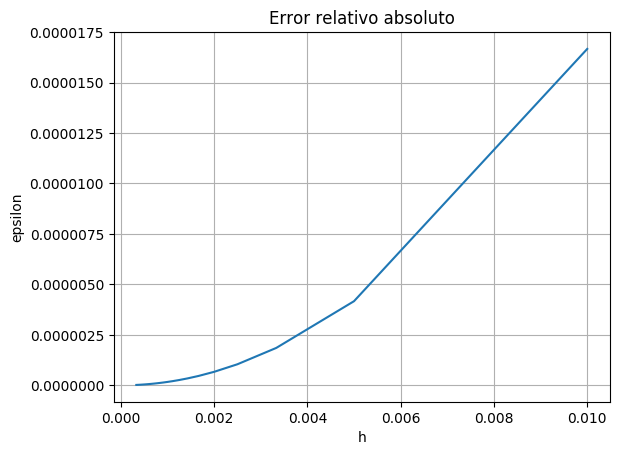

In [15]:
#Se grafica el error relativo absoluto
xlabel("h")
ylabel("epsilon")
title("Error relativo absoluto")
grid("on")
plot(symmDiffArray,symmEpsilonArray);

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Sean $ f,g $ dos funciones que van de los reales a los reales, y dos constantes (reales) $ a,b$

$$ \Delta_h(af(x)+b(g(x)) = [af(x+h) + bg(x+h)] - [af(x) + bg(x)] = a[f(x+h) - f(x)] + b[g(x+h) - g(x)]$$

entonces se ve que

$$ \Delta_h(af(x)+b(g(x)) = a\Delta_h(af(x)) + b\Delta_h(bg(x))$$

Por tanto es un Operador Lineal!

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.

Partiendo de la serie de Taylor para la exponensial:

$$ e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1+ \sum_{n=1}^{\infty} \frac{x^n}{n!}$$

Entonces al evaluar la exponencial en $ h\frac{d}{d\xi}$ :

$$ e^{h\frac{d}{d\xi}} = 1 + \sum_{n=1}^{\infty} \frac{1}{n!} h\frac{d}{d\xi} $$

Despejando $ \Delta_h$:

$$ \Delta_h = \sum_{n=1}^{\infty} \frac{1}{n!} h\frac{d}{d\xi} = e^{h\frac{d}{d\xi}} - 1 = \Phi(h\frac{d}{d\xi})$$

entonces concluimos que:

$$ \Phi(x) = e^x - 1$$